In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("twitter_training.csv")

In [7]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
col_name=['ID','Entity','Sentiments','Contest']
df=pd.read_csv("twitter_training.csv",names=col_name)

In [10]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.shape

(74682, 4)

In [12]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [13]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(2340)

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(71656, 4)

In [22]:
sentiments_counts=df['Sentiments'].value_counts()
sentiments_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

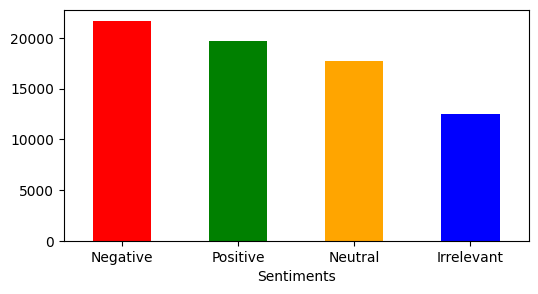

In [25]:
plt.figure(figsize=(6,3))
sentiments_counts.plot(kind='bar',color=['red','green','orange','blue'])
plt.title=('Sentiment Distribution')
plt.xlabel=('Sentiments')
plt.xticks(rotation=0)
plt.show()

In [27]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiments_counts=brand_data['Sentiments'].value_counts()
brand_sentiments_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

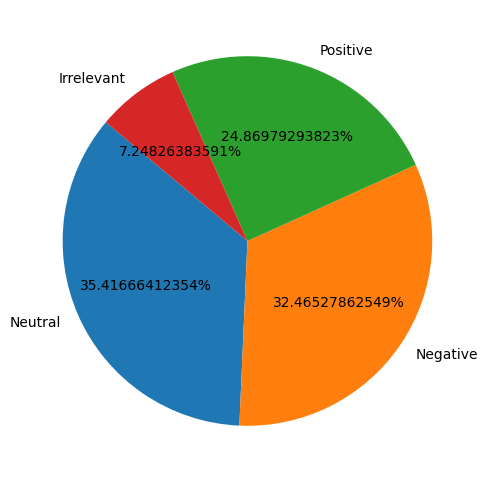

In [32]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiments_counts,labels=brand_sentiments_counts.index,autopct="%1.11f%%",startangle=140)
plt.show